<a href="https://colab.research.google.com/github/vilavivida/Babeval/blob/master/Copy_of_Manipulating_Image_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data, Machines and the 🐍 
<img src="https://raw.githubusercontent.com/habermanUIUC/CodeStoryLessons/main/lessons/dmap/projects/image_compress/html/section00.png" align="left"/>

<a id="install"></a>
## Notebook Preparation for Lesson 1•2•3
Each lesson will start with a similar template (given in the course schedule):  
1. **save** to your google drive (copy to drive)<br/><img src="https://raw.githubusercontent.com/habermanUIUC/CodeStoryLessons/main/assets/images/colab/copy-to-drive.png"/>
2. **update** the NET_ID to be your netID (no need to include @illinois.edu)
3. **run** the next cell to install the IDE. <img src="https://raw.githubusercontent.com/habermanUIUC/CodeStoryLessons/main/assets/images/colab/play-button.png"/>

In [ ]:
LESSON_ID = 'dmap:projects:image_compress'   # keep this as is
NET_ID    = 'chuhany2' # CHANGE_ME to your netID (keep the quotes)

def install_ide(net_id, lesson_id):
  import sys
  if 'codestories' not in sys.modules:
      print('installing modules')
      !pip install git+https://mehaberman@bitbucket.org/mehaberman/codestories.git --upgrade &> install.log
  
  from codestories.cs.CodeStories import CodeStory
  return CodeStory(net_id, lesson_id)

ide = install_ide(NET_ID, LESSON_ID)
print(ide.welcome())

Telling the story: Manipulating Image Data


# Lesson Manipulating Image Data
(hit ▶ to read the first part of the lesson️)

In [ ]:
# run to read the next section
ide.reader.view_section(1)

In [ ]:
# type&run the above example/exercise in this cell

In [ ]:
# run to read the next section
ide.reader.view_section(3)

400 454
w:400 h:454


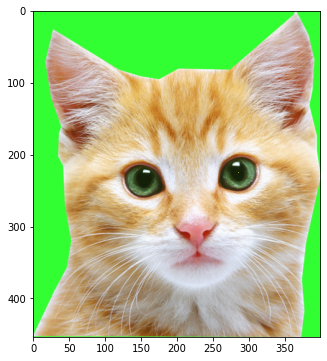

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import LessonUtil as Util

class RCImage(object):
  def __init__(self, filename):
    self.__image_data = np.load(filename)
    self.__width = self.__image_data.shape[1]
    self.__height = self.__image_data.shape[0]

  def __repr__(self):
    return 'w:{} h:{}'.format(self.__width, self.__height)
  
  @property
  def width(self):
    return self.__width
  
  @property
  def height(self):
    return self.__height

  def get_pixels(self):
    return self.__image_data
  
  def display(self, size = 6):
    fig,ax = plt.subplots(figsize = (size,size))
    ax.imshow(self.get_pixels())
    return fig
  
  def get_pixel(self, row, col, scale = False):
    if scale:
      return self.__image_data[row][col] * 255
    else:
      return self.__image_data[row][col]


def test_image():
    fn = 'fun.npy'
    path = Util.path_for_data(fn)
    np_image = RCImage(path)

    print(np_image.width, np_image.height)
    print(np_image)
    fig = np_image.display()


test_image()

# ide.tester.test_function(test_image)

In [ ]:
# run to read the next section
ide.reader.view_section(5)

In [ ]:
# test it again
# test_image()

In [ ]:
# run to read the next section
ide.reader.view_section(7)

In [ ]:
class RCImage(object):
  def __init__(self, path):
    self.__image_data = np.load(path)
    self.__width = self.__image_data.shape[1]
    self.__height = self.__image_data.shape[0]

  def __repr__(self):
    return 'w:{} h:{}'.format(self.__width, self.__height)
  
  @property
  def width(self):
    return self.__width
  
  @property
  def height(self):
    return self.__height

  def get_pixels(self):
    return self.__image_data
  
  def display(self, size = 6):
    fig,ax = plt.subplots(figsize = (size,size))
    ax.imshow(self.get_pixels())
    return fig
  
  def get_pixel(self, row, col, scale = False):
    if scale:
      return self.__image_data[row][col] * 255.0
    else:
      return self.__image_data[row][col]

  def find_color(self, r = 0, g = 0, b = 0):
    pixel_lst = []
    for x in range(self.__height):
        for y in range(self.__width):
            (r_query, g_query, b_query) = tuple(self.get_pixel(x,y,scale = True))
            if r_query == r and g_query == g and b_query == b:
              pixel = (x,y)
              pixel_lst.append(pixel)
    return pixel_lst

def test_image_pixels():
    fn = 'fun.npy'
    path = Util.path_for_data(fn) 
    np_image = RCImage(path)
    pixel = np_image.get_pixel(225, 285)
    r_query, g_query, b_query = tuple(pixel)
    print(type(r_query))
    locations = np_image.find_color(255, 255, 0)
    print(locations)
test_image_pixels()


<class 'numpy.float32'>
[(225, 285)]


In [ ]:
# run to read the next section
ide.reader.view_section(9)

# Image Convolution

In [ ]:
# run to read the next section
ide.reader.view_section(10)

In [ ]:
# 4x4x3 matrix
matrix = np.array([
  # red         green      blue
 [[0.8980392,  0.78431374, 0.5647059 ],
  [0.8745098,  0.7529412,  0.5058824 ],
  [0.8901961,  0.7764706,  0.5137255 ],
  [0.91764706, 0.80784315, 0.6313726 ]],

 [[0.89411765, 0.7921569,  0.6039216 ],
  [0.9019608 , 0.8039216,  0.5529412 ],
  [0.89411765, 0.7764706,  0.47058824],
  [0.92156863, 0.8039216,  0.5568628 ]],

 [[0.8666667,  0.7764706,  0.5294118 ],
  [0.9411765,  0.8392157,  0.6156863 ],
  [0.9254902,  0.8039216,  0.5882353 ],
  [0.9098039,  0.7921569,  0.5254902 ]],

 [[0.92156863, 0.81960785, 0.5882353 ],
  [0.91764706, 0.7882353,  0.5372549 ],
  [0.9372549,  0.83137256, 0.6117647 ],
  [0.9254902,  0.8117647,  0.5882353 ]]])

class RGBImageKernel(object):
  def __init__(self):
    pass

  def apply(self, matrix):
    stack = np.vstack(matrix)
    r_avg = np.mean(stack[:, 0])  # all rows, first column, take the average
    g_avg = np.mean(stack[:, 1])
    b_avg = np.mean(stack[:, 2])
    return (r_avg, g_avg, b_avg)

def test_kernel():
  #  print(matrix.shape) # 4,4,3
   kernel = RGBImageKernel()
   v = kernel.apply(matrix)  
   # this is the answer
   ans = (0.90857843625, 0.7975490375, 0.5615196275000001)
   print(np.allclose(v, ans))

# def kernel_tester():
#   ide.tester.test_functionality('kernel')
  
test_kernel()
# ide.tester.test_functionality('kernel')

True


In [ ]:
# run to read the next section
ide.reader.view_section(12)

(28, 25, 3)
(113, 100, 3)
(28, 25, 3)


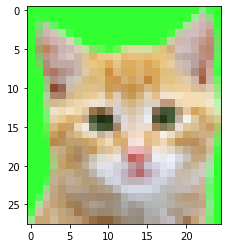

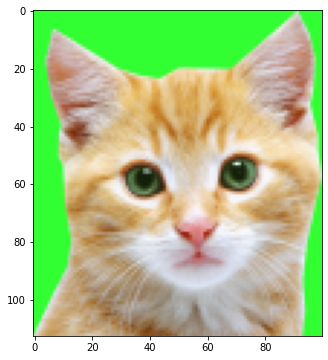

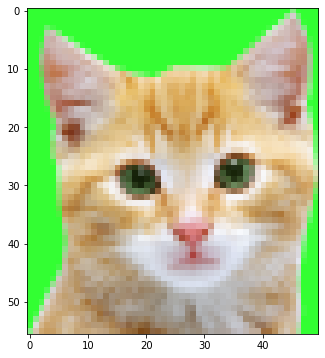

In [ ]:
# type&run the above example/exercise in this cell
import math

class RCImage(object):
  def __init__(self, filename = None, img_data = None):
    if filename == None:
      self.__image_data = img_data
    else:
      self.__image_data = np.load(filename)
      
    self.__width = self.__image_data.shape[1]
    self.__height = self.__image_data.shape[0]

  def __repr__(self):
    return 'w:{} h:{}'.format(self.__width, self.__height)
  
  @property
  def width(self):
    return self.__width
  
  @property
  def height(self):
    return self.__height

  def get_pixels(self):
    return self.__image_data
  
  def display(self, size = 6):
    fig,ax = plt.subplots(figsize = (size,size))
    ax.imshow(self.get_pixels())
    return fig
  
  def get_pixel(self, row, col, scale = False):
    if scale:
      return self.__image_data[row][col] * 255.0
    else:
      return self.__image_data[row][col]

  def find_color(self, r = 0, g = 0, b = 0):
    pixel_lst = []
    for x in range(self.__height):
        for y in range(self.__width):
            (r_query, g_query, b_query) = tuple(self.get_pixel(x,y,scale = True))
            if r_query == r and g_query == g and b_query == b:
              pixel = (x,y)
              pixel_lst.append(pixel)
    return pixel_lst
  
  def apply(self, kernel, size = 16):
    pixels = np.zeros(shape=((self.__height//size), (self.__width//size), 3))
    for row in range(0, self.__height//size):
      for col in range(0, self.__width//size):
        window_of_data = self.__image_data[row*size: row*size+size, col*size: col*size+size]
        pixels[row,col] = kernel.apply(window_of_data)
    # print(self.__image_data.shape)
    return pixels


fn = 'fun.npy'
path = Util.path_for_data(fn)
image_data = np.load(path)
np_image = RCImage(path)
kernel = RGBImageKernel()
pixels = np_image.apply(kernel)
print(pixels.shape)
implot = plt.imshow(pixels)

pix4 = np_image.apply(kernel, size=4)
i4 = RCImage(img_data=pix4)
print(i4.get_pixels().shape)
# ide.tester.test_functionality('convolution')

fn = 'fun.npy'
path = Util.path_for_data(fn)
np_image = RCImage(path)

kernel = RGBImageKernel()
pix4 = np_image.apply(kernel, size = 4)
pix8 = np_image.apply(kernel, size = 8)
i4 = RCImage(img_data = pix4)
i8 = RCImage(img_data = pix8)
ig = i4.display()
ig = i8.display()

pixX = i4.apply(kernel, size = 4)
iX = RCImage(img_data = pixX)
print(iX.get_pixels().shape)
# ide.tester.test_functionality('convolution2')

In [ ]:
# run to read the next section
ide.reader.view_section(14)

In [ ]:
def create_compressed_image():

    # show the original
    fn = 'fun.npy'
    path = Util.path_for_data(fn)
    np_image = RCImage(path)
    ig = np_image.display()
    
    # create an effect
    kernel = RGBImageKernel()
    pix = np_image.apply(kernel, size=16)
    
    # use the result as a new image to show !!
    b_img = RCImage(img_data=pix)
    ig = b_img.display()

# ide.tester.test_functionality('kernel')
# ide.tester.test_functionality('convolution')

In [ ]:
# run to read the next section
ide.reader.view_section(16)

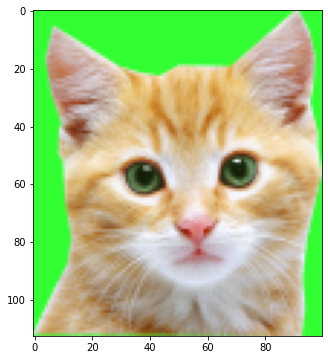

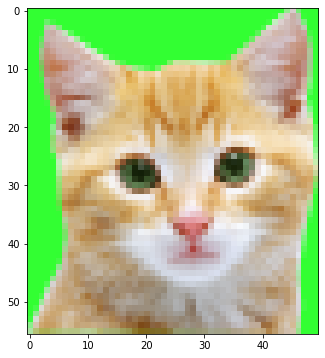

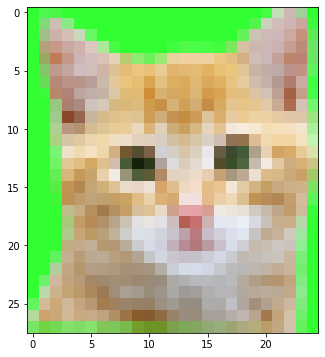

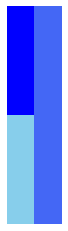

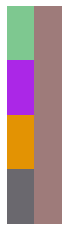

In [ ]:



import matplotlib.patches as patches


def demo_convolution(window):

  # this kernel creates an 'average'
  kernel = np.ones((4,4)) * 1/4

  # matrix multiplication 
  out = window * kernel
  # sum up the r,g,b,alpha
  ave_pixel = np.sum(out, axis=0)

  # print(kernel)
  # print(window)
  # print(out)
  # print(ave_pixel)

  # 'plot' the results
  fig, ax = plt.subplots(figsize=(4, 4))
  ax.imshow([[r] for r in window]) 
  ax.add_patch(patches.Rectangle((0, -0.5),0.5,4.0, facecolor = ave_pixel))
  ax.xaxis.set_visible(False) 
  ax.yaxis.set_visible(False)
  ax.set_frame_on(False)
  
four_colors = np.array([
  [0.4980392,  0.78431374, 0.5647059, 1.0], 
  [0.6745098,  0.1529412,  0.9058824, 1.0],
  [0.8901961,  0.5764706,  0.0137255, 1.0],
  [0.41764706, 0.40784315, 0.4313726, 1.0]])

blue_window = np.array([
  [0,  0,  1, 1.0],                   # blue
  [0,  0,  1, 1.0],
  [135/255,  206/255,  235/255, 1.0], # sky-blue
  [135/255,  206/255,  235/255, 1.0]])

demo_convolution(blue_window)
demo_convolution(four_colors)

# Test and Submit

In [ ]:
# run to read the next section
ide.reader.view_section(18)

In [ ]:
# print(ide.tester.test_notebook()) 
print(ide.tester.test_notebook(verbose=True)) 

# once you are ready -- run this 
ide.tester.download_solution()

Score 100/100

pixels 15/15

find_color 15/15

kernel 30/30
Yes!
convolution 30/30
Super
convolution2 10/10
Super
image_compress.py contains valid python; it will be downloaded


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>